### Dependencies on your python package manager `pip`:
- `python3`
- `ipykernel`
- `pip install numpy`
- `pip install matplotlib`
- `pip install tqdm`
- `pip install scipy`

#### A second easier solution
You can run this in https://colab.research.google.com/?utm_source=scs-index with login google without the package dependencies

- Just import the notebook file `.ipynb`

![](https://i.imgur.com/o35sGOt.png)

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
import subprocess
import random
import json
from tqdm import tqdm
import math
from scipy import special
plt.style.use('dark_background')

## Generate Your Big O Notations of Push_swap ! 
- put path of your executable : `path = "./push_swap"`
- Define max elements to test = `max_elements_to_test = 500`
- Let's run and take a coffee it's little bit long 
    - (`6 second for 100`)
    - (`approx 30min for 500`  ⚠ it's exponential)

In [44]:
min = 0
max = 1000
max_elements_to_test = 500
path = "../push_swap"

In [7]:
data = list()
mean_list = list()

for pop in tqdm(range(5, max_elements_to_test)):
    for i in range(1, 10):
        value = list()
        generate = random.sample(range(min, max), pop)

        space = ""
        for n in generate:
            space = f"{space} {n}"
        output =subprocess.check_output(f"{path} {space} | wc -l", shell=True)
        value.append(output.decode('ascii').strip())
    data = np.array(value, dtype='int64')
    mean_list.append(data.mean())


100%|██████████| 95/95 [00:06<00:00, 15.74it/s]


### Save data in Json file in your Path :
- put `path_and_name = "big_O.json"`

In [8]:
#np.savetxt("list.log", mean_list, delimiter=",")
path_and_name = "big_O.json"
with open("big_O.json","w") as f :
    json.dump(mean_list, f,indent=2)

## Visualize With Other Complexity Notations !
- Open your `big_O.json` and plot him

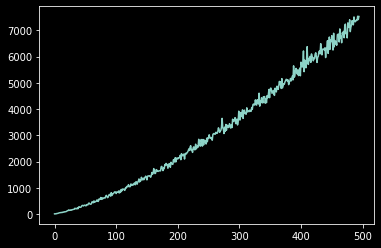

In [37]:
with open("big_O.json","r") as f :
    mean_list = json.load(f)

plt.plot(mean_list)

## Plot with all other Complexity :
- ### Save the File :
- change de default path and name if you want `pictures_name = "big_O_chart.png"`
- Just run the cell 

In [38]:
pictures_name = "big_O_chart.png"

/tmp/ipykernel_4598/3837719722.py:6: RuntimeWarning: divide by zero encountered in log2
  log_n_O = np.log2(x) **3
/tmp/ipykernel_4598/3837719722.py:8: RuntimeWarning: divide by zero encountered in log2
  n_log_n_O = x * np.log2(x)
/tmp/ipykernel_4598/3837719722.py:8: RuntimeWarning: invalid value encountered in multiply
  n_log_n_O = x * np.log2(x)


Text(0.5, 1.0, 'Big O Notations Graph')

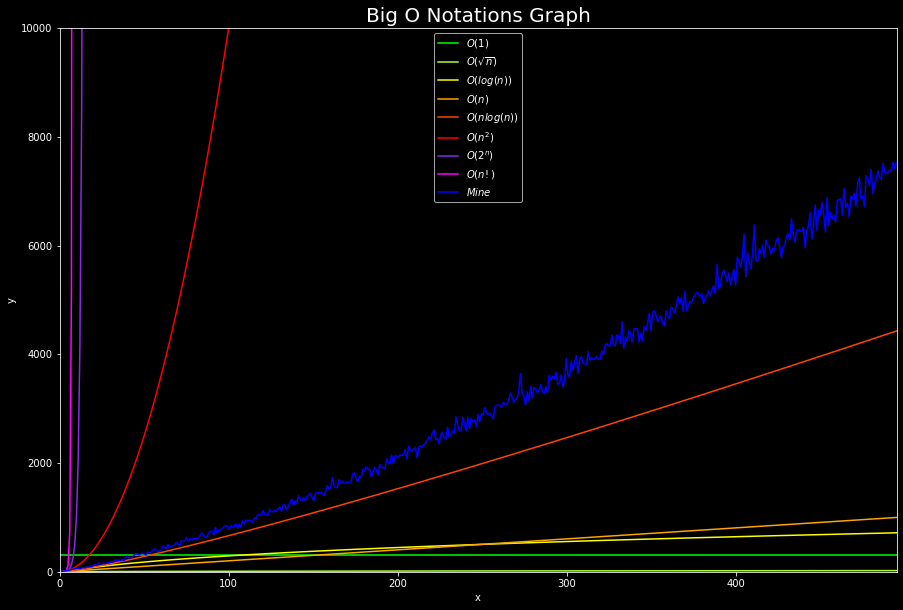

In [49]:
#environnement
nbr_elements = max_elements_to_test - 5
x = np.linspace(0, nbr_elements, nbr_elements)

linear_O = np.linspace(min, max , nbr_elements)
log_n_O = np.log2(x) **3
sqrt_n_O = np.sqrt(x) **1
n_log_n_O = x * np.log2(x)
quadratrique_O = x ** 2
exponential_O = 2**x
factorial_O = scipy.special.factorial(x)

plt.figure(figsize=(15, 10))
plt.axhline(300, label='$O(1)$', color='lime')
plt.plot(x, sqrt_n_O, label='$O(\sqrt{n})$', color='greenyellow')
plt.plot(x, log_n_O, label='$O(log(n))$', color='yellow')
plt.plot(x, linear_O, label='$O(n)$', color='orange')
plt.plot(x, n_log_n_O, label='$O(nlog(n))$', color='orangered')
plt.plot(x, quadratrique_O, label='$O(n^2)$', color='red')
plt.plot(x, exponential_O, label='$O(2^n)$', color='blueviolet')
plt.plot(x, factorial_O, label='$O(n!)$', color='magenta')
plt.plot(x, mean_list, label='$Mine$', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.axis([0,nbr_elements,0,10000])
plt.legend()
# plt.grid()
plt.savefig(pictures_name)
plt.title('Big O Notations Graph',fontsize=20)